# Ex 3. Separate inhibitory population

In [102]:
import numpy as np
import matplotlib.pyplot as plt

**3.1.** Write down the total input to an excitatory and an inhibitory neuron. Show that the average input
to an excitatory neuron is equivalent to the input to a neuron in the model of exercise 2, for b = 0.

**Part 1.**
The total input to an excitatory neuron is comprised of inputs from inhibitory and excitatory neurons:
$$h_{i} = h_{exc} - h_{inh}$$
Firstly, we consider $h_{exc}$:
\begin{align}
h_{exc} = W \sigma_{exc}
 = \sum_{j}^{N} W_{ij}^{E \leftarrow E} \sigma_{j}(t)
 = \sum_{j}^{N} \frac{c}{N} \sum_{\mu}^{M} \xi_{i}^{\mu} \xi_{j}^{\mu} \sigma_{j}(t)
\end{align}
Secondly, we consider $h_{inh}$:
\begin{align}
h_{inh} = W \sigma_{inh}
 = \sum_{k}^{K} W_{ik}^{E \leftarrow I} \sigma_{k}^{I}(t)
 = \sum_{k}^{K} \frac{ca}{N_{I}} \sum_{\mu}^{M} \xi_{i}^{\mu} \sigma_{k}^{I}(t)
\end{align}
Hence, the total input to the excitatory neuron is:
\begin{align}
h_{i} = \sum_{j}^{N} W_{ij}^{E \leftarrow E} \sigma_{j}(t) - \sum_{k}^{N_{I}} W_{ik}^{E \leftarrow I} \sigma_{k}^{I}(t)
\end{align}

Analogously, the total input to the inhibitory neuron is equal to:
\begin{align}
h_{k} = \sum_{k} W_{ki}^{I \leftarrow E} \sigma_{k}(t) = \frac{1}{K} \sum_{k} \sigma_{k}(t),
\end{align}
where $k \in S$, where $S$ is the set of pre-synaptic neurons.


**Part 2.**
1. Inhibiting neurons have linear gain function and fire stochastically: $Prob(\sigma_k = +1| h_{k}^{inh}) = h_{k}^{inh}$, where k is an index of an inhibitory neuron $1 \le k \le N_{I}$.

2. Each inhibitory neuron $k$ recieves receives input from $K$ excitatory neurons. Connections are random and of equal weight $w_{ki}^{I \leftarrow E} = \frac{1}{K}$.
3. Thus, the input potential of the neuron k is $h_{k}^{inh} = \frac{1}{K} \sum_{j \in S}$, where S is the set of pre-synaptic neurons.
4. Connection from inhibitory neuron back to excitatory neuron $w_{ik}^{E \leftarrow I} = \frac{a}{N_I} \sum_{\mu} \xi_{i}^{\mu}$
5. The total input from inhibitory neuron to excitatory is, therefore, $h_{inh} = \sum_{k} w_{ik}^{E \leftarrow I} \sigma_{k} = \sum_{k} \frac{a}{N_I} \sum_{\mu} \xi_{i}^{\mu} \sigma_{k} = \frac{ca}{N_I} \sum_{k} \sum_{\mu} \xi_{i}^{\mu} \sigma_{k}$.
6. Putting everything together and considering that $k=j$ and $N=N_I$.
$$<h_{i}(t)> = \frac{c}{N} \sum_{\mu}^{M} \xi_{i}^{\mu} \sum_{j}^{N} \xi_{j}^{\mu} \sigma_{j}(t) - \frac{c}{N} \sum_{\mu}^{M} \xi_{i}^{\mu} \sum_{j}^{N} \xi_{j}^{\mu} \sigma_{j}(t) a$$
$$ = \frac{c}{N} \sum_{\mu}^{M} \sum_{j}^{N} \xi_{i}^{\mu} (\xi_{j}^{\mu} - a) \sigma_{j}(t)$$
Which is equivalent to the low-activity Hopfield model discussed in part 2:
$$<h_{i}(t)> = \sum_{j}^{N} w_{ij} \sigma_{j}(t)$$
$$ = \frac{c}{N} \sum_{j}^{N} \sum_{\mu}^{M} (\xi_{i}^{\mu}-b)(\xi_{j}^{\mu}-a) \sigma_{j}(t)$$
$$ = \frac{c}{N} \sum_{j}^{N} \sum_{\mu}^{M} \xi_{i}^{\mu}(\xi_{j}^{\mu}-a) \sigma_{j}(t), QED$$

**3.2.** Write a method for simulating this new model.
There are two ways of updating the states. Either the input hi(t) to excitatory neuron i depends on σI(t)
(synchronous update); or hi(t) depends on σI(t + 1) (sequential update). Implement both.


In [103]:
N=300
N_I=80

def generate_low_activity_patterns(M, N, a):
    """
    Generate low-activity random patterns with specified activity level.
    """
    return np.random.choice([0, 1], size=(M, N), p=[1-a, a])

def stochastic_spike_variable_exc(state):
        firing_probability = 0.5 * (state + 1) 
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma

def stochastic_spike_variable_inh(K, sigma):
        firing_probability = 1/K * np.sum(sigma)
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma
'''
def compute_overlap_exc(patterns, sigma, sigma_I, a, N, N_I):
    """
    Compute synaptic weights for excitatory-excitatory.
    """
    M = patterns.shape[0]
    c = 2 / (a * (1 - a))
    m = np.zeros(patterns.shape[0])
    for i in range(len(m)):
        m[i] = c / N * np.dot(patterns[i, :],sigma) - c / N_I * a[i] * np.sum(sigma_I)
    return m

def compute_syn_weights_inh(K, N_I):
    """
    Compute synaptic weights for inhibitory-excitatory.
    """
    return np.ones(N_I)/K

def compute_inputs_exc(m, patterns):
    """
    Compute the state of the network.
    """
    return np.dot(m, patterns.T)

def compute_inputs_inh(K, N_I, sigma):
    """
    Compute the state of the network.
    """
    return compute_syn_weights_inh(K, N_I)*np.sum(sigma)
'''

'\ndef compute_overlap_exc(patterns, sigma, sigma_I, a, N, N_I):\n    """\n    Compute synaptic weights for excitatory-excitatory.\n    """\n    M = patterns.shape[0]\n    c = 2 / (a * (1 - a))\n    m = np.zeros(patterns.shape[0])\n    for i in range(len(m)):\n        m[i] = c / N * np.dot(patterns[i, :],sigma) - c / N_I * a[i] * np.sum(sigma_I)\n    return m\n\ndef compute_syn_weights_inh(K, N_I):\n    """\n    Compute synaptic weights for inhibitory-excitatory.\n    """\n    return np.ones(N_I)/K\n\ndef compute_inputs_exc(m, patterns):\n    """\n    Compute the state of the network.\n    """\n    return np.dot(m, patterns.T)\n\ndef compute_inputs_inh(K, N_I, sigma):\n    """\n    Compute the state of the network.\n    """\n    return compute_syn_weights_inh(K, N_I)*np.sum(sigma)\n'

In [104]:
def generate_low_activity_patterns(M, N, a):
    """
    Generate low-activity random patterns with specified activity level.
    """
    return np.random.choice([0, 1], size=(M, N), p=[1-a, a])

def stochastic_spike_variable_exc(state):
        firing_probability = 0.5 * (state + 1) 
        sigma = np.random.binomial(1, firing_probability) # P{σ_i(t) = +1 | S_i(t)}
        return sigma

def stochastic_spike_variable_inh(h_inh):
        h_inh = np.tanh(h_inh)
        #print(np.tanh(h_inh))
        sigma_I = np.random.binomial(1, h_inh) # P{σ_i(t) = +1 | S_i(t)}
        return sigma_I

def compute_w_ee(N, a, patterns):
    """
    Compute synaptic weights for excitatory-excitatory.
    """
    c = 2 / (a * (1 - a))
    w_ee = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            w_ee[i, j] = c / N * np.dot(patterns[:, i], patterns[:, j])
    return w_ee

def compute_w_ie(K, N_I):
    """
    Compute synaptic weights for excitatory-inhibitory.
    """
    return np.ones((N_I))/K

def compute_w_ei(N_I, a, patterns):
    """
    Compute synaptic weights for inhibitory-excitatory.
    """
    c = 2 / (a * (1 - a))
    w_ei = c*a/N_I * np.sum(patterns, axis=0)
    return w_ei

def compute_inputs_exc(N, N_I, w_ee, w_ei, sigma, sigma_I, selected_exc):
    """
    Compute the state of the network.
    Each inhibitry neuron output maps back to its pre-synaptic excitatory neurons.
    """
    sigma_I_expanded = np.zeros((N, N_I))
    #print(selected_exc)
    for i in range(N_I):
        sigma_I_expanded[selected_exc[:,i],i] = sigma_I[i]
    sigma_I_expanded = np.sum(sigma_I_expanded, axis=1)
    return np.dot(w_ee, sigma) - np.dot(w_ei, sigma_I_expanded)

def compute_inputs_inh(K, N_I, w_ie, sigma):
    """
    Compute the state of the network.
    We store the selected excitatory neurons for each inhibitory neuron.
    """
    h_inh = np.zeros(N_I)
    selected_exc = np.zeros((K, N_I), dtype=int)
    for i in range(N_I):
        selected_exc[:,i] = np.random.choice(N, size=K, replace=False)
        input_exc = sigma[selected_exc[:,i]]
        h_inh[i] = w_ie[i]*np.sum(input_exc)
    return h_inh, selected_exc

def compute_state(s, theta):
    """
    Compute the state of the network.
    """
    return np.tanh(s-theta)

def hamming_distance(patterns, sigma):
    """
    Compute the hamming distance between patterns and sigma.
    """
    return (len(sigma) - np.dot(patterns, sigma))/(2*len(sigma))


In [105]:
def update_network(N, N_I, sigma_E, sigma_I, W_EE, W_EI, W_IE, selected_neurons, theta):
    """
    Update the network synchronously.
    """
    inputs_E = compute_inputs_exc(N, N_I, W_EE, sigma_E, W_EI, sigma_I, selected_neurons)
    inputs_I, selected_neurons = compute_inputs_inh(K, N_I, W_IE, sigma_E)

    # Update states based on inputs
    #sigma_E = np.array([stochastic_spike_variable_exc(input - theta) for input in inputs_E]) # fix this
    #sigma_I = np.array([stochastic_spike_variable_inh(input - theta) for input in inputs_I]) # fix this

    state_E = compute_state(inputs_E, theta)
    state_I = compute_state(inputs_I, theta)
    return state_E, state_I, selected_neurons

def simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='synchronous'):
    """
    Simulate the network dynamics.
    """
    patterns = generate_low_activity_patterns(M, N, a)
    # flip 5% of indices
    initial_state = patterns[0,:].copy()
    flip_indices = np.random.choice(len(initial_state), int(N*0.05), replace=False)
    initial_state[list(flip_indices)] *= -1
    state_E = initial_state
    state_I = np.random.choice([0, 1], size=N_I, p=[1-a, a])

    W_EE = compute_w_ee(N, a, patterns)
    W_EI = compute_w_ei(N_I, a, patterns)
    W_IE = compute_w_ie(K, N_I)

    sigma_E = stochastic_spike_variable_exc(state_E)
    sigma_I = stochastic_spike_variable_inh(state_I)

    selected_neurons = np.zeros((K, N_I), dtype=int)
    store = {"excitatory_sync":[], 
             "inhibitory_sync":[],
             "excitatory_async":[],
             "inhibitory_async":[],
             "patterns":[]}
    ham_dist = []

    for step in range(num_steps):
        if update_type == 'synchronous':
            state_E, state_I, selected_neurons = update_network(N, N_I, sigma_E, sigma_I, W_EE, W_EI, W_IE, selected_neurons, theta)
            sigma_E = stochastic_spike_variable_exc(state_E)
            sigma_I = stochastic_spike_variable_inh(state_I)
            store['excitatory_sync'].append(np.sum(state_E))
            store['inhibitory_sync'].append(np.sum(state_I))
            
        else:
            # Asynchronous update: Update one neuron at a time
            for i in range(N):
                state_E = compute_state(compute_inputs_exc(N, N_I, W_EE[i,:], W_EI[i], sigma_E, sigma_I, selected_neurons),theta)
                sigma_E[i] = stochastic_spike_variable_exc(state_E)[i]
            for k in range(N_I):
                h_inh, selected_neurons = compute_inputs_inh(K, N_I, W_IE, sigma_E)
                state_I = compute_state(h_inh,theta) #-> not sure about this
                sigma_I[k] = stochastic_spike_variable_inh(h_inh)[k]
            store['excitatory_async'].append(np.sum(state_E))
            store['inhibitory_async'].append(np.sum(state_I))
        ham_dist.append(hamming_distance(patterns, sigma_E))
    return store, ham_dist

# Parameters
N = 300  # Number of excitatory neurons
N_I = 80 # Number of inhibitory neurons
M = 10   # Number of patterns
K = 60   # Connections from excitatory to inhibitory
a = 0.1  # Activity level
theta = 1# Threshold
num_steps = 100

# Initial random states
#state_E = np.random.choice([0, 1], size=N, p=[1-a, a])
state_I = np.random.choice([0, 1], size=N_I, p=[1-a, a])

# Run the simulation
#states_sync = simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='synchronous')
#states_async = simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='asynchronous')
store, ham_dist = simulate_network(N, N_I, M, K, a, theta, num_steps, update_type='asynchronous')

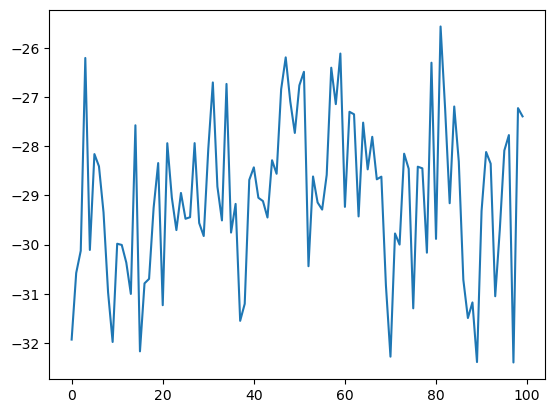

In [106]:
plt.plot(np.arange(num_steps), np.array(store['inhibitory_async']), label='Excitatory')

### Maybe I have to convert the states either into 0 and 1 or patterns into 1 and -1

In [107]:
def retrieve_patterns(ham_dist, M, N):
    """
    Retrieve the stored patterns.
    """
    M_max = 0
    for i in range(M):
        if ham_dist[-1,i] < 0.05:
            M_max += 1
    return M_max / N

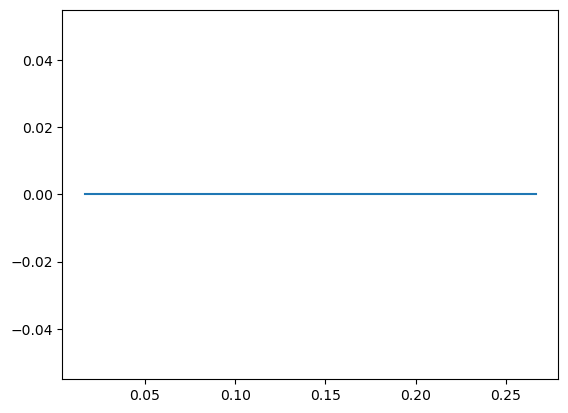

In [108]:
M = np.linspace(5,80,16)
retrieved_patterns = np.zeros(len(M))

for i,m in enumerate(M):
    store, hamm_dist = simulate_network(N, N_I, int(m), K, a, theta, num_steps, update_type='asynchronous')
    hd = np.stack(hamm_dist)
    retrieved_patterns[i] = retrieve_patterns(hd, int(m), N)

plt.figure()
plt.plot(M/N, retrieved_patterns, label='Inhibitory') 

[0.45833333 0.45333333 0.46333333 0.43666667 0.46       0.45166667
 0.44666667 0.445      0.445      0.46833333]


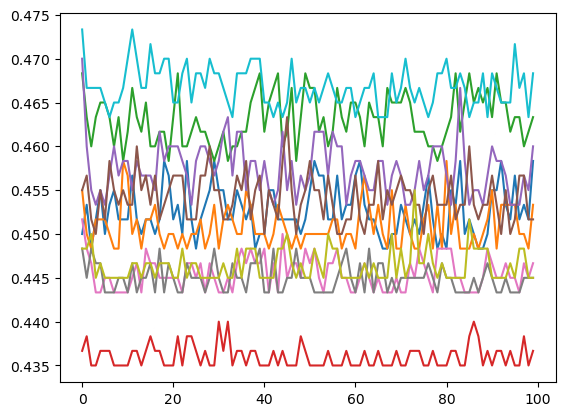

In [109]:
plt.figure()
store, hamm_dist = simulate_network(N, N_I, 10, K, a, theta, num_steps, update_type='asynchronous')
plt.plot(np.arange(num_steps), hamm_dist, label='Excitatory')
print(hamm_dist[-1])

**3.4.** Repeat question 3.3 with this model. Does the second inhibitory population improve the capacity?

In [132]:
def compute_inputs_inh2(a, sigma):
    """
    Compute the input to the second inhibitory population.
    """
    mean_activity = np.mean(sigma)
    return np.tanh(mean_activity - a)

def valid_probability(p):
    """
    Ensure the probability is within [0, 1] and not NaN.
    """
    return np.clip(np.nan_to_num(p), 0, 1)

def simulate_network_inh2(N, N_I, M, K, a, theta, num_steps, update_type='synchronous', J=0, external_input_f=None, pattern_length=None):
    """
    Simulate the network dynamics with an additional secondary inhibitory population.
    Can be simulated with and without external input.
    Inputs: 
        N: number of excitatory neurones
        N_I: number of inhibitory neurones
        M: number of patterns
        K: number of excitatory neurones that each inhibitatory neurone is connected to
        a: mean activity level
        theta: firing threshold
        num_steps: number of time steps
        update_type: Synchronous or Asynchronous
        J: strength of external input, 0 by default
        external_input_f: function for calculating external input, None by default
        pattern_length: length of random sequence of patterns to present, None by default
    Outputs: 
        store: contains dictionary :
            "excitatory_sync": sums of active excitatory neurons at each time step for synchronous updates
            "inhibitory_sync": sums of active inhibitory neurons at each time step for synchronous updates
            "excitatory_async": sums of active excitatory neurons at each time step for asynchronous updates
            "inhibitory_async": sums of active inhibitory neurons at each time step for asynchronous updates
        ham_dist: contains Hamming distances between current network state and each pattern at each time step
    """
    # initial patterns and state
    patterns = generate_low_activity_patterns(M, N, a)
    # 5% flip
    initial_state = patterns[0, :].copy()
    flip_indices = np.random.choice(len(initial_state), int(N * 0.05), replace=False)
    initial_state[flip_indices] *= -1
    
    # initial states for exc and inh neurones + secondary inh population
    state_E = initial_state
    state_I = np.random.choice([0, 1], size=N_I, p=[1-a, a])
    sigma_I2 = 0  

    # synaptic weights
    W_EE = compute_w_ee(N, a, patterns)
    W_EI = compute_w_ei(N_I, a, patterns)
    W_IE = compute_w_ie(K, N_I)

    # stochastic state initialisation
    sigma_E = stochastic_spike_variable_exc(state_E)
    sigma_I = stochastic_spike_variable_inh(state_I)

    # storage initialisation
    selected_neurons = np.zeros((K, N_I), dtype=int)
    store = {
        "excitatory_sync": [],
        "inhibitory_sync": [],
        "excitatory_async": [],
        "inhibitory_async": []
    }
    ham_dist = []

    if pattern_length:
        pattern_sequence = np.random.choice(M, pattern_length, replace=True)
    else:
        pattern_sequence = []

    for step in range(num_steps):
        # computing hamming distances
        hamming_distances = []
        for p in range(M):
            hamming_distances.append(hamming_distance(patterns[p], sigma_E))
        ham_dist.append(hamming_distances)

        ext_input = np.zeros(N)
        if external_input_f and step < 5:
            if pattern_sequence is not None:
                mu = pattern_sequence[step % pattern_length]
            else:
                mu = step % M
            ext_input = external_input_f(J, patterns, mu)
            
        if update_type == 'synchronous':
            # computing inputs 
            inputs_E = compute_inputs_exc(N, N_I, W_EE, W_EI, sigma_E, sigma_I, selected_neurons) - sigma_I2 + ext_input
            inputs_I, selected_neurons = compute_inputs_inh(K, N_I, W_IE, sigma_E)
            sigma_I2 = compute_inputs_inh2(a, sigma_E) 
            
            # updating states with inputs
            state_E = compute_state(inputs_E, theta)
            state_I = compute_state(inputs_I, theta)
            
            # stochastic updates for states of neurones
            sigma_E = np.random.binomial(1, valid_probability(0.5 * (state_E + 1)))
            sigma_I = np.random.binomial(1, valid_probability(np.tanh(inputs_I)))
            
            # storing results of synch update 
            store['excitatory_sync'].append(np.sum(state_E))
            store['inhibitory_sync'].append(np.sum(state_I))
        else:
            # Asynchronous update: Update one neuron at a time
            # excitatory
            for i in range(N):
                input_E = compute_inputs_exc(N, N_I, W_EE[i, :], W_EI[i], sigma_E, sigma_I, selected_neurons) - sigma_I2 + ext_input
                state_E[i] = compute_state(input_E[i], theta)
                sigma_E[i] = np.random.binomial(1, valid_probability(0.5 * (state_E[i] + 1)))

            # inhibitory
            for k in range(N_I):
                input_I, selected_neurons = compute_inputs_inh(K, N_I, W_IE, sigma_E)
                state_I = compute_state(input_I, theta)
                sigma_I[k] = np.random.binomial(1, valid_probability(np.tanh(input_I[k])))

            # secondary inhibitory population
            sigma_I2 = compute_inputs_inh2(a, sigma_E)

            # storing results of asynch update
            store['excitatory_async'].append(np.sum(state_E))
            store['inhibitory_async'].append(np.sum(state_I))
    
    return store, ham_dist

# parameters
N = 300 # number of neurones
N_I = 80 # number of inhibitory neurones
M = 10 # number of patterns
K = 60 # number of excitatory neurones
a = 0.1 # mean activity
theta = 1 # firing threshold
num_steps = 100
J = 2 # external input strength

# running simulations
results_sync = simulate_network_inh2(N, N_I, M, K, a, theta, num_steps, update_type='synchronous')
results_async = simulate_network_inh2(N, N_I, M, K, a, theta, num_steps, update_type='asynchronous')

print("done")


done


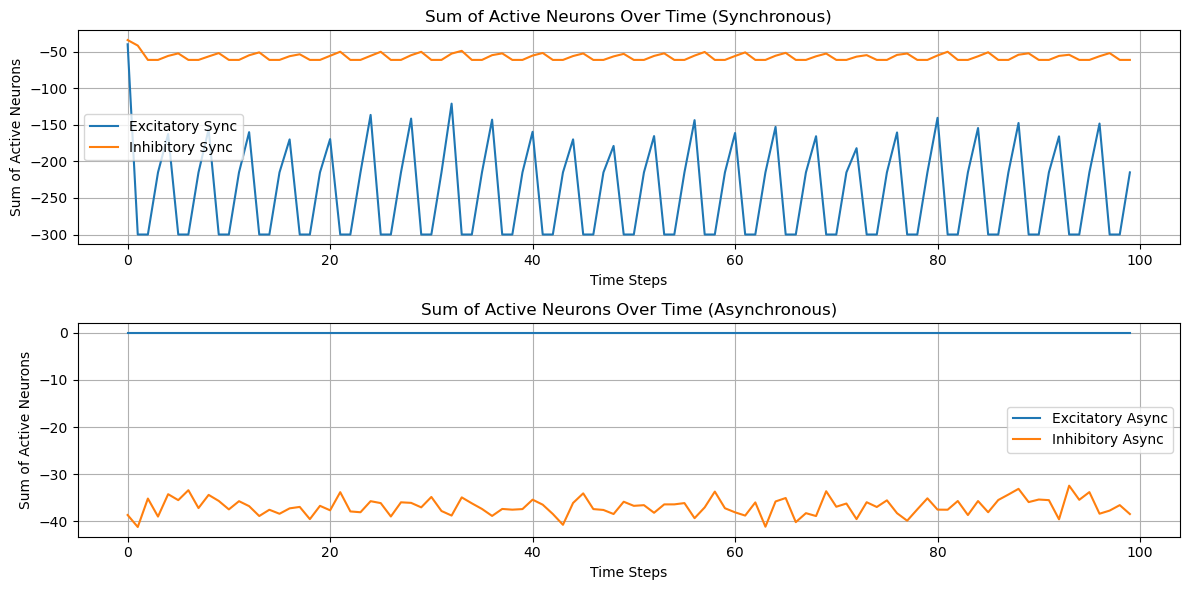

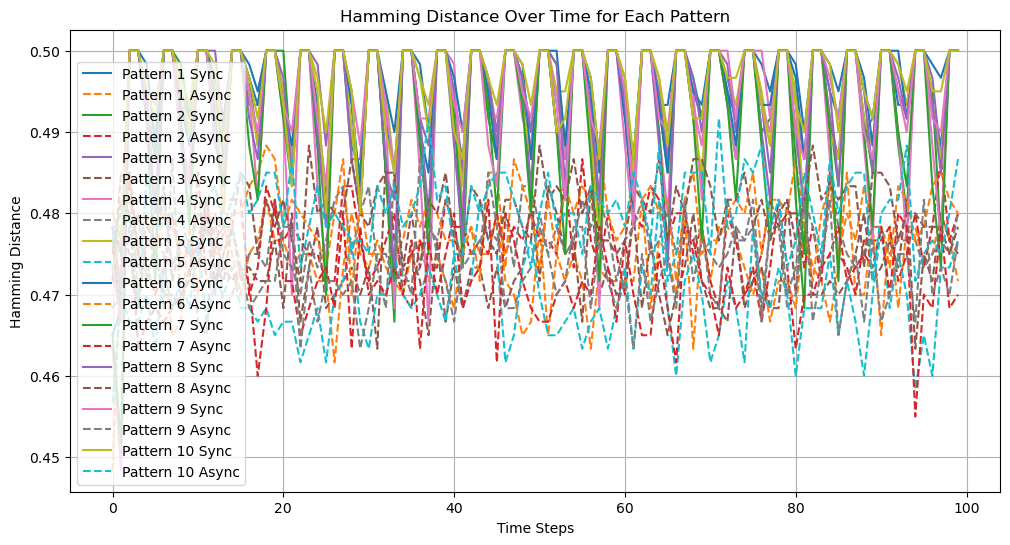

Final Hamming Distances: [0.435      0.47166667 0.43666667 0.45833333 0.45       0.43
 0.46833333 0.47       0.45       0.46833333]


In [129]:
#PLOTTING RESULTS

# Plotting the sum of active neurons over time
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(results_sync[0]['excitatory_sync'], label='Excitatory Sync')
plt.plot(results_sync[0]['inhibitory_sync'], label='Inhibitory Sync')
plt.title('Sum of Active Neurons Over Time (Synchronous)')
plt.xlabel('Time Steps')
plt.ylabel('Sum of Active Neurons')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(results_async[0]['excitatory_async'], label='Excitatory Async')
plt.plot(results_async[0]['inhibitory_async'], label='Inhibitory Async')
plt.title('Sum of Active Neurons Over Time (Asynchronous)')
plt.xlabel('Time Steps')
plt.ylabel('Sum of Active Neurons')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting Hamming distances over time for each pattern
plt.figure(figsize=(12, 6))
for p in range(M):
    plt.plot([hd[p] for hd in results_sync[1]], label=f'Pattern {p+1} Sync')
    plt.plot([hd[p] for hd in results_async[1]], label=f'Pattern {p+1} Async', linestyle='--')
plt.title('Hamming Distance Over Time for Each Pattern')
plt.xlabel('Time Steps')
plt.ylabel('Hamming Distance')
plt.legend()
plt.grid(True)
plt.show()
print(f"Final Hamming Distances: {ham_dist[-1]}")

**WE STILL NEED TO COMPARE 3.3 TO 3.4**

**3.5.** With the same parameters as previously, M = 10 patterns, and input strength J = 2, present a
sequence of the patterns in random order to the network.

In [133]:
def external_input(J, patterns, mu):
    """
    External input calculated for pattern retrieval with external input.
    """
    patterns_mean = np.mean(patterns, axis=0)
    return J*(patterns[mu] - patterns_mean)

# parameters
N = 300 # number of neurones
N_I = 80 # number of inhibitory neurones
M = 10 # number of patterns
K = 60 # number of excitatory neurones
a = 0.1 # mean activity
theta = 1 # firing threshold
num_steps = 50
J = 2 # external input strength
pattern_length = 10 # length of pattern sequence

# running simulations
results_sync_with_input = simulate_network_inh2(N, N_I, M, K, a, theta, num_steps, update_type='synchronous', J=0, external_input_f=external_input, pattern_length=10)
results_async_with_input = simulate_network_inh2(N, N_I, M, K, a, theta, num_steps, update_type='asynchronous', J=0, external_input_f=external_input, pattern_length=10)
print("done")

done


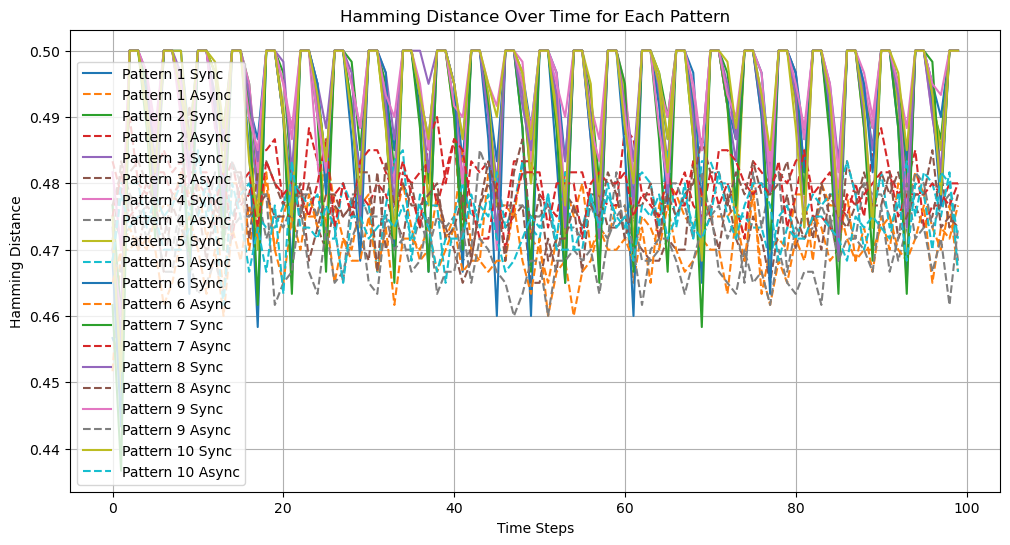

Final Hamming Distances: [0.435      0.47166667 0.43666667 0.45833333 0.45       0.43
 0.46833333 0.47       0.45       0.46833333]


In [134]:
plt.figure(figsize=(12, 6))
for p in range(M):
    plt.plot([hd[p] for hd in results_sync[1]], label=f'Pattern {p+1} Sync')
    plt.plot([hd[p] for hd in results_async[1]], label=f'Pattern {p+1} Async', linestyle='--')
plt.title('Hamming Distance Over Time for Each Pattern')
plt.xlabel('Time Steps')
plt.ylabel('Hamming Distance')
plt.legend()
plt.grid(True)
plt.show()
print(f"Final Hamming Distances: {ham_dist[-1]}")

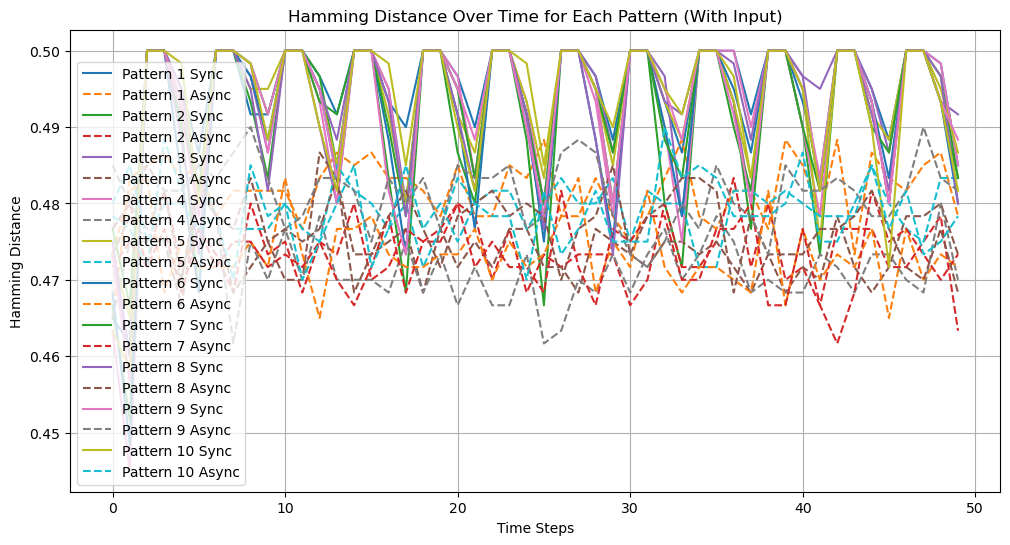

In [135]:
# Plotting Hamming distances over time for each pattern with input
plt.figure(figsize=(12, 6))
for p in range(M):
    sync_distances = []
    async_distances = []
    for step in results_sync_with_input[1]:
        sync_distances.append(step[p])
    for step in results_async_with_input[1]:
        async_distances.append(step[p])

    plt.plot(sync_distances, label=f'Pattern {p+1} Sync')
    plt.plot(async_distances, label=f'Pattern {p+1} Async', linestyle='--')

plt.title('Hamming Distance Over Time for Each Pattern (With Input)')
plt.xlabel('Time Steps')
plt.ylabel('Hamming Distance')
plt.legend()
plt.grid(True)
plt.show()

Does the network correctly retrieve all the presented patterns?

No, the network does not correctly retrieve all the presented patterns. The Hamming distances do not decrease to zero or stabilize at low values, indicating that the patterns are not being correctly retrieved.
If not, what is the reason?

Possible reasons include:
Noise and Network Capacity: The network might be affected by noise or it might not have sufficient capacity to store and retrieve all patterns correctly.
Parameter Settings: Parameters such as the threshold theta, the input strength J, and the mean activity level a might not be optimized for correct pattern retrieval.
External Input: Although the external input is applied, it does not seem to effectively help the network in stabilizing the patterns. The duration and strength of the external input might need adjustment.